# Food Demand Project : Team E

## Topic: Tanzania

## Goals:

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(B) Nutritional content of different foods](#nutrition)
* [(B) Nutritional adequacy of diet](#adequacy)
* [(A) Estimate Demand System](#demand)
* [(C) Counterfactual Experiments](#counterfactual)
* [(A) Presentation](#presentation)

### Setup

In [10]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [36]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'

In [37]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
# x.columns.name = 'j'
                 
# Change 'Tanzania' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'

# Reformat x to match structure
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns='j', aggfunc='first').reset_index()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [38]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

In [39]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
  2019-20 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
  2019-20 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
  2019-20 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
  2019-20 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...  Wheat, barley, other grains  \
i t       m                              ...                                
1 2008-09 Mainland Rural            NaN  ...                          NaN   
  2010-11 Mainland Rural            NaN  ...                          NaN   
  2012-13 Mainland Rural            NaN  ...                          NaN   
  2014-15 Mainland Rural            NaN  ...                          NaN   
  2019-20 Mainland Rural            NaN  ...                          NaN   

j                         Wild birds and insects  Wine and spirits  \
i t       m                                                          
1 2008-09 Mainland Rural                     NaN               NaN   
  2010-11 Mainland Rural                     NaN               NaN   
  2012-13 Mainland Rural                     NaN               NaN   
  2014-15 Mainland Rural                     NaN               NaN   
  2019-20 Mainland Rural                     NaN               NaN   

j                         Yams/cocoyams  bread  eggs  salt  sugar  sugarcane  \
i t       m                                                                    
1 2008-09 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2010-11 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2012-13 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2014-15 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2019-20 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   

j                         sweets  
i t       m                       
1 2008-09 Mainland Rural     NaN  
  2010-11 Mainland Rural     NaN  
  2012-13 Mainland Rural     NaN  
  2014-15 Mainland Rural     NaN  
  2019-20 Mainland Rural     NaN  

[5 rows x 67 columns]

In [40]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

In [41]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

## (B) Nutritional content of different foods <a class="anchor" id="nutrition"></a>
For all the foods we are considering for our population, we will describe their nutritional content, in terms that allow us to compare with recommended daily allowances. We'll be using ____ recommendations, which is better suited for our population.

## (B) Nutritional adequacy of diet<a class="anchor" id="adequacy"></a>
Now that we have the data for our food, we will try to analyze the adequacy of the diets in the population we're studying. What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [42]:
y = y.stack()

d = d.stack()

# Remove duplicate indexes
idx = np.unique(d.index.values, return_index = True)[1]
d = d.iloc[idx] 

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [48]:
from cfe import Regression

result = Regression(y=y,d=d)

In [49]:
result.predicted_expenditures()

i    t        m               j                                       
1    2012-13  Mainland Rural  Beef                                        3113.583322
                              Cassava fresh                               1870.492050
                              Citrus fruits                                602.276686
                              Coconuts                                    1339.504102
                              Cooking oil                                 1105.390406
                                                                             ...     
995  2012-13  Mainland Rural  Ripe bananas                                 330.027581
                              Soft drinks                                  953.785595
                              Spinach, cabbage, other green vegetables     483.966342
                              Sweet potatoes                               946.487956
                              Tea (dry)                              

<IPython.core.display.Javascript object>


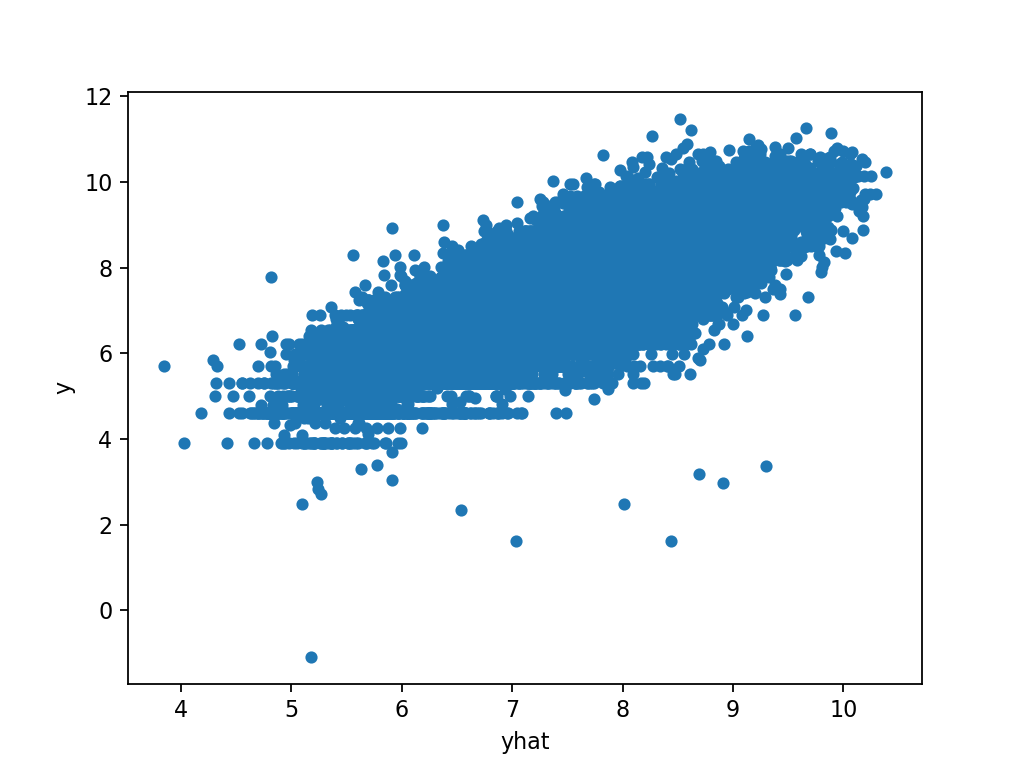

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [50]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters

### (Relative) Income Elasticity

In [52]:
result.get_beta().sort_values()

j
Maize (flour)                                            0.045376
Tea (dry)                                                0.200758
Cassava fresh                                            0.264385
Sweet potatoes                                           0.277939
Peas, beans, lentils and other pulses                    0.317230
Coconuts                                                 0.345060
Rice (husked)                                            0.350601
Plantains                                                0.358373
Irish potatoes                                           0.403830
Other spices                                             0.411583
Beef                                                     0.424183
Pastries                                                 0.433438
Cooking oil                                              0.450191
Dried/salted/canned fish                                 0.456425
Soft drinks                                              0.466285
Fresh mi

<IPython.core.display.Javascript object>


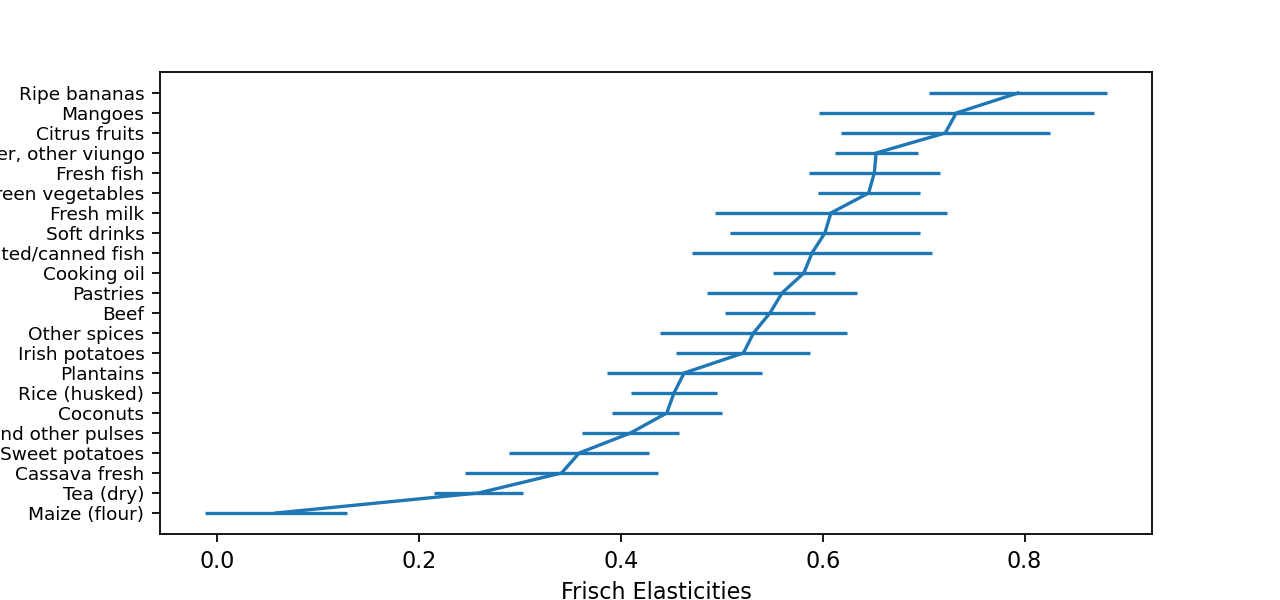

<IPython.core.display.Javascript object>


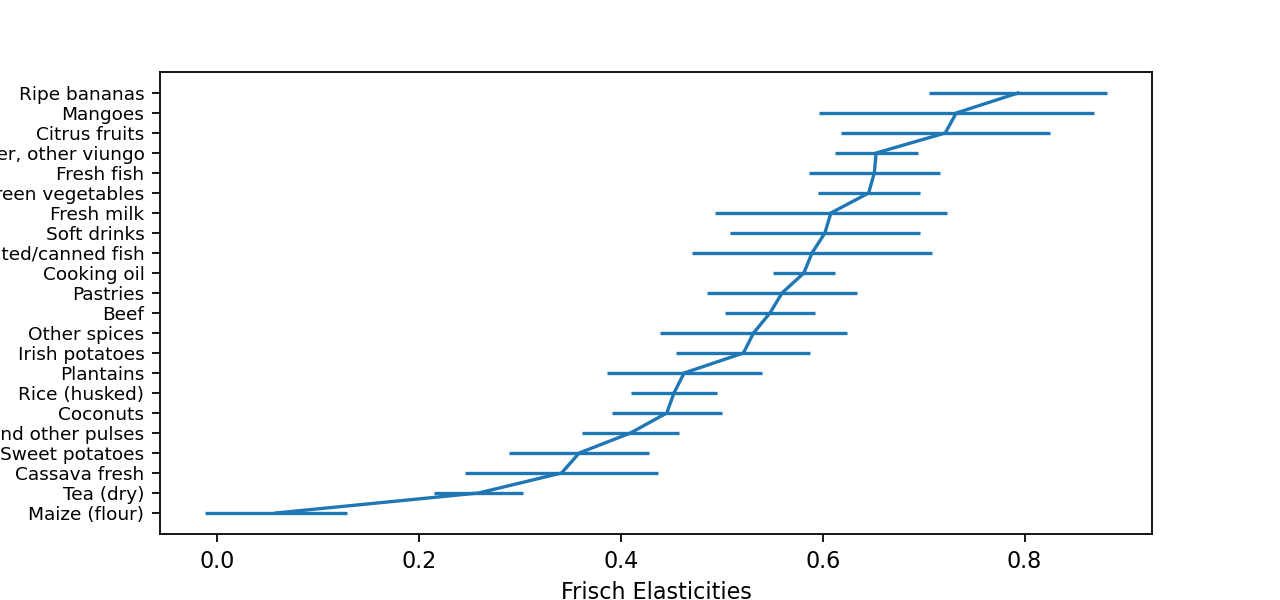

In [53]:
result.graph_beta()

### Demand and Household Composition¶

In [54]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Beef,-0.066288,-0.005091,0.007675,0.044101,0.084292,0.045674,0.044978,-0.050760,0.004724,-0.029995,0.063858,0.042288,0.136140,0.131593,0.199785,-0.075300,-0.653566
Cassava fresh,0.058655,0.049630,0.136947,0.024753,0.043588,0.002480,0.150727,0.015201,0.039534,0.102453,0.083211,0.102035,0.056311,0.158144,-0.047616,-0.065774,-0.356761
Citrus fruits,-0.035324,-0.067996,-0.012954,0.000911,0.023383,0.014413,-0.029659,-0.075366,-0.077117,0.044548,-0.021350,0.034666,0.065496,-0.040385,0.419493,-0.060704,-0.802713
Coconuts,0.051952,0.060887,0.043364,0.055633,0.047763,0.026433,0.075137,0.028930,0.067234,0.081359,0.033470,0.067923,0.095642,0.074433,0.016677,-0.087062,-0.424482
Cooking oil,-0.038490,0.001681,0.003355,0.073323,0.120988,0.080278,-0.009378,-0.065133,0.004043,0.027324,0.054383,0.048323,0.116672,0.066049,0.133334,-0.041571,-0.507255
Dried/salted/canned fish,0.024755,-0.026505,0.005642,-0.023298,0.082126,0.092563,-0.013113,-0.030315,-0.017743,0.023792,0.032276,0.045203,0.068281,0.025793,0.316723,-0.078382,-0.710560
Fresh fish,-0.007744,0.001723,-0.000560,0.055036,0.118796,0.113851,-0.006542,-0.051382,-0.018716,-0.014471,-0.016103,0.040664,0.115910,0.054611,0.299307,-0.024297,-0.793200
Fresh milk,0.037342,-0.007666,-0.022165,0.044079,0.103166,0.011626,-0.101519,-0.040426,-0.023843,0.082036,0.049971,0.014702,0.125784,0.094335,0.138870,-0.055583,-0.562522
Irish potatoes,-0.044606,-0.013331,-0.010018,0.046699,0.069615,0.034998,0.020287,-0.045627,-0.056906,-0.006423,0.014083,0.003184,0.073672,0.044916,0.388396,-0.123956,-0.814829


## (C) Counterfactual Experiments<a class="anchor" id="counterfactual"></a>
If everyone's total food expenditures doubled (holding prices fixed)
how would this affect nutrition in the population? What if relative food prices changed?
Think of other counterfactual experiments that might be interesting.

## (A) Presentation<a class="anchor" id="prensentation"></a>